# Correlation Between Corruption and Food Prices
By Harshal Patel, Sabrina Almazan, Isis Kazadi, Katie Rink

Here we will write what we are attempting to do

In [5]:
#imports
import pandas as pd
import numpy as np

### Creating Datasets
Here we will write a brief description of the data sets

In [6]:
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)

### Clean Data
Explain decisions we made about countries

In [7]:
#Cleaning Values for Price Data
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + PriceData.mp_month.astype(str) + '/01')
#Only include chosen countries
PriceData = PriceData[PriceData['adm0_name'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include Chosen Years
PriceData = PriceData[PriceData["date"].isin(pd.date_range('2013-01-01','2021-01-01'))]

#Drop unused columns
PriceData = PriceData.drop('mp_year', 1)
PriceData = PriceData.drop('mp_month', 1)
PriceData = PriceData.drop('adm1_id', 1)
PriceData = PriceData.drop('adm1_name', 1)
PriceData = PriceData.drop('mkt_id', 1)
PriceData = PriceData.drop('mkt_name', 1)
PriceData = PriceData.drop('cur_id', 1)
PriceData = PriceData.drop('cur_name', 1)
PriceData = PriceData.drop('pt_id', 1)
PriceData = PriceData.drop('pt_name', 1)
PriceData = PriceData.drop('um_id', 1)
PriceData = PriceData.drop('um_name', 1)
PriceData = PriceData.drop('mp_commoditysource', 1)
#Put all values to lower case
PriceData = PriceData.applymap(lambda s: s.lower() if type(s) == str else s)
Categories = Categories.applymap(lambda s: s.lower() if type(s) == str else s)
#Shorten the names of the cm_name
PriceData['cm_name'] = PriceData['cm_name'].str.split(' -').str.get(0)
#renaming column headers to more understandable
PriceData.rename(columns={'adm0_id': 'Country_ID', 'adm0_name': 'Country', 'cm_id':'Item_ID','cm_name':'Item','mp_price':'price'}, inplace=True)

#Create a value of year value to allow merge
PriceData['Year'] = pd.DatetimeIndex(PriceData['date']).year

PriceData.head()

,Country_ID,Country,Item_ID,Item,price,date,Year
417258,52.0,china,84,wheat,2.6567,2014-01-01,2014
417259,52.0,china,84,wheat,2.6100,2014-02-01,2014
417260,52.0,china,84,wheat,2.6160,2014-03-01,2014
417261,52.0,china,84,wheat,2.5700,2014-04-01,2014
417262,52.0,china,84,wheat,2.5400,2014-05-01,2014


In [8]:
#Cleaning Data for corruptiong index
#Only include chosen countries
CorruptData = CorruptData[CorruptData['Country'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include chosen years
CorruptData = CorruptData.filter(regex='2013|2014|2015|2016|2017|2018|2019|2020|Country')
#Only looking at CPI score
CorruptData = CorruptData.filter(regex='Country|CPI')
#Make all values lower case
CorruptData = CorruptData.applymap(lambda s: s.lower() if type(s) == str else s)

#Correct Indexes
CorruptData = CorruptData.reset_index()

#Make header years only
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI Score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace(' ', ''))

#Create new dataset making year and country columns to graph
modified = CorruptData.filter(['Country'], axis=1)
modified = pd.concat([modified]*8, ignore_index=True)
modified = modified.sort_values(by='Country')
modified.insert(1, 'Year', [2013, 2014, 2015, 2016, 2017,2018,2019,2020]*5)
modified['CPI Score'] = ''

for index, row in modified.iterrows():
    modified.set_value(index,'CPI Score', CorruptData.loc[CorruptData['Country'] == row['Country']][str(row['Year'])].values[0])
    
modified.head()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Country,Year,CPI Score
0,china,2013,40
30,china,2014,36
25,china,2015,37
5,china,2016,40
20,china,2017,41


In [9]:
#Merge Datasets together for futher analysis
MergedData = pd.merge(PriceData, modified, on=['Country','Year'])

### Overall Analysis
Explain what trends we see just in regard to CPI and price

In [10]:
#Datasets based on Country
SudanData = MergedData[MergedData['Country'].isin(['sudan'])]
MexicoData = MergedData[MergedData['Country'].isin(['mexico'])]
ChinaData = MergedData[MergedData['Country'].isin(['china'])]
IraqData = MergedData[MergedData['Country'].isin(['iraq'])]
EthiopiaData = MergedData[MergedData['Country'].isin(['ethiopia'])]

#Get Average Price
SudanData =  SudanData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
MexicoData = MexicoData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
ChinaData = ChinaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
IraqData = IraqData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})
EthiopiaData = EthiopiaData.groupby('Year', as_index=False).agg({'price': 'mean', 'CPI Score': 'first', 'Country': 'first'})

In [11]:
#Plot Sudan Correlation between CPI and Price
SudanData.plot(x='Year', y=['CPI Score','price'])

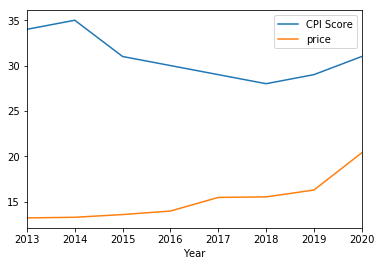

In [12]:
#Plot Mexico Correlation between CPI and Price
MexicoData.plot(x='Year', y=['CPI Score','price'])

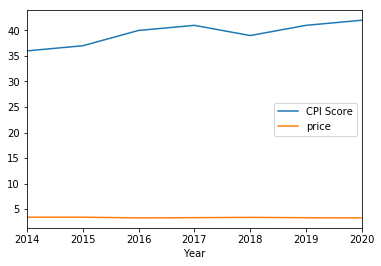

In [13]:
#Plot China Correlation between CPI and Price
ChinaData.plot(x='Year', y=['CPI Score','price'])

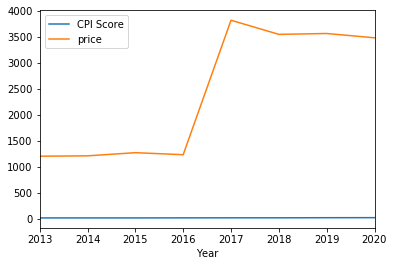

In [14]:
#Plot Iraq Correlation between CPI and Price
IraqData.plot(x='Year', y=['CPI Score','price'])

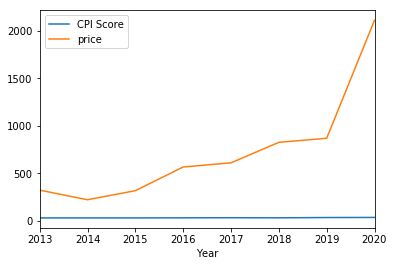

In [15]:
#Plot Ethiopia Correlation between CPI and Price
EthiopiaData.plot(x='Year', y=['CPI Score','price'])

## Categorical Analysis
Explain the ways we broke up the data

### Dairy Analysis

The dairy products have been selected via an online list from https://www.listchallenges.com/. Each food item included the name, price, country of origin, and the date of said price. All of the data was converted to lowercase and any detailed post-fixes were removed to allow smoother merging for analysis sake

### Grains Analysis

### Meat Analysis

### Vegetables and Fruits Analysis